In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../chestx_pseudolabeled_data.csv')

In [3]:
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,2.247095e-05,4.649162e-05,0.000157,0.000196,4.541874e-05,0.000147,0.011330,0.306152,0.403320,0.000069
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,3.635883e-06,1.311302e-06,0.000134,0.000141,7.629395e-06,0.000040,0.017715,0.180542,0.369629,0.000044
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,1.106262e-04,4.756451e-05,0.000566,0.000416,3.583431e-04,0.000448,0.021484,0.344727,0.060760,0.000154
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,7.724762e-05,1.015067e-04,0.000612,0.000970,2.251863e-04,0.001099,0.064392,0.158936,0.046631,0.000106
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,5.227327e-05,3.101826e-04,0.000253,0.000177,6.061792e-05,0.000259,0.010208,0.201294,0.115967,0.000054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,...,1.838207e-04,1.333952e-04,0.000951,0.000807,2.758503e-04,0.001024,0.025665,0.194824,0.070923,0.000259
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,...,8.612871e-05,1.293421e-04,0.000218,0.000194,1.454353e-04,0.000602,0.016983,0.279541,0.036560,0.000102
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,...,7.748604e-07,1.788139e-07,0.000009,0.000014,3.576279e-07,0.000002,0.002823,0.051178,0.714355,0.000006
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,...,1.847744e-05,1.567602e-05,0.000090,0.000102,2.145767e-05,0.000114,0.016403,0.330322,0.059540,0.000057


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
class_names = ['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal',
               'NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged', 'NGT - Normal',
               'CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal', 'Swan Ganz Catheter Present']

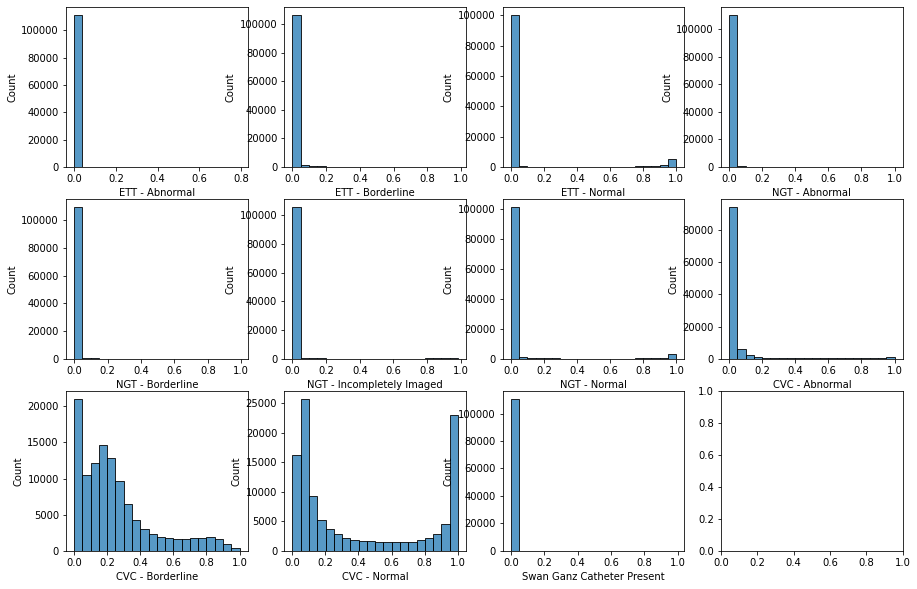

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for i, class_name in enumerate(class_names):
    sns.histplot(df, x=class_name, bins=20, ax=axs[i // 4][i % 4])

In [14]:
df_train = pd.read_csv('../dataset/train.csv')

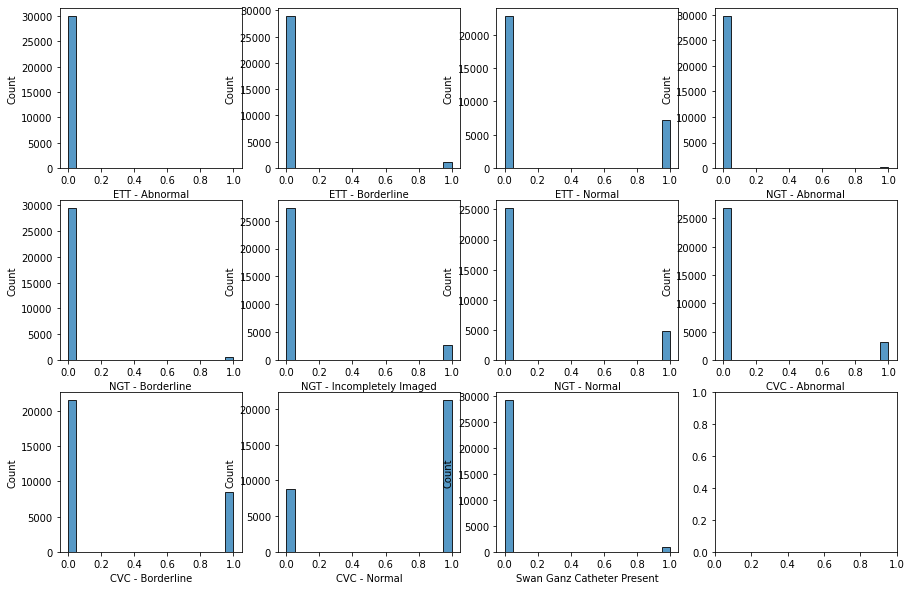

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for i, class_name in enumerate(class_names):
    sns.histplot(df_train, x=class_name, bins=20, ax=axs[i // 4][i % 4])

In [18]:
df[df['CVC - Normal'] > 0.99].shape

(12890, 40)

In [19]:
df[df['CVC - Normal'] > 0.95].shape

(23086, 40)

In [30]:
df_new = pd.concat([df, df[df['CVC - Normal'] > 0.95]], ignore_index=True)

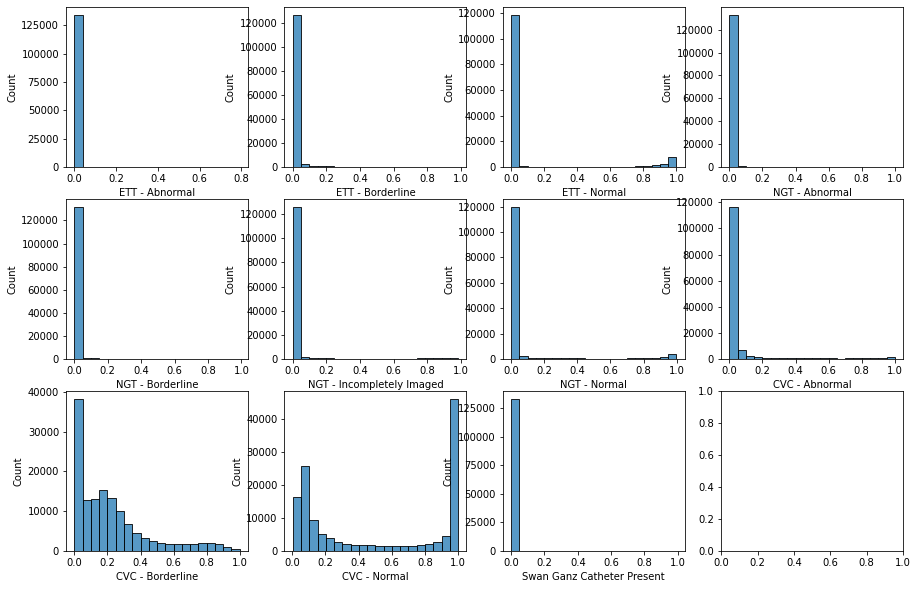

In [31]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for i, class_name in enumerate(class_names):
    sns.histplot(df_new, x=class_name, bins=20, ax=axs[i // 4][i % 4])

In [32]:
df_new[df_new['CVC - Borderline'] > 0.70].shape

(8527, 40)

In [33]:
df_new = pd.concat([df_new, df_new[df_new['CVC - Borderline'] > 0.70]], ignore_index=True)

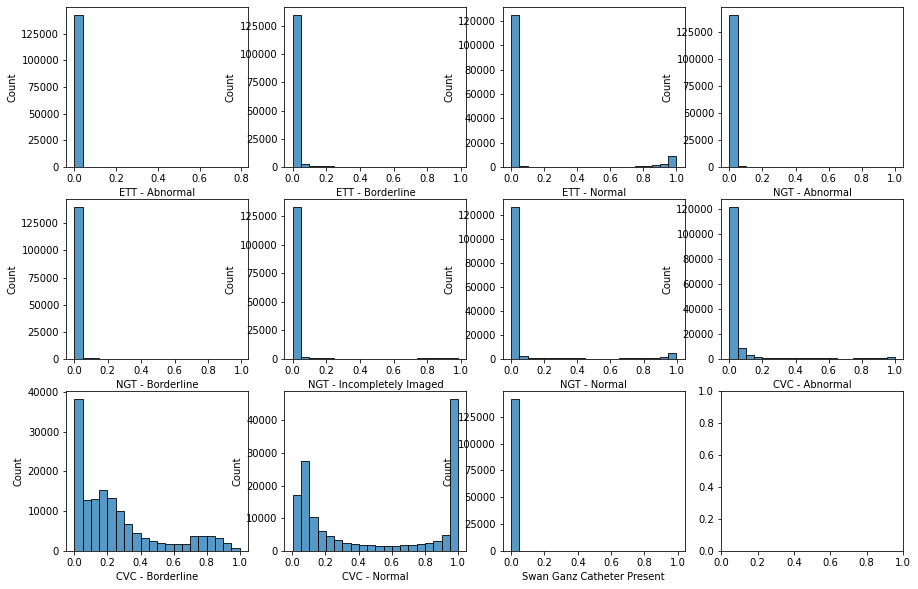

In [34]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for i, class_name in enumerate(class_names):
    sns.histplot(df_new, x=class_name, bins=20, ax=axs[i // 4][i % 4])

In [35]:
df_new.shape

(143733, 40)

In [29]:
df.shape

(112120, 40)

In [37]:
df_new[df_new['ETT - Borderline'] > 0.60].shape

(1536, 40)

In [40]:
df_new = pd.concat([df_new, df_new[df_new['ETT - Borderline'] > 0.60]], ignore_index=True)
df_new = pd.concat([df_new, df_new[df_new['ETT - Borderline'] > 0.60]], ignore_index=True)
df_new = pd.concat([df_new, df_new[df_new['ETT - Borderline'] > 0.60]], ignore_index=True)

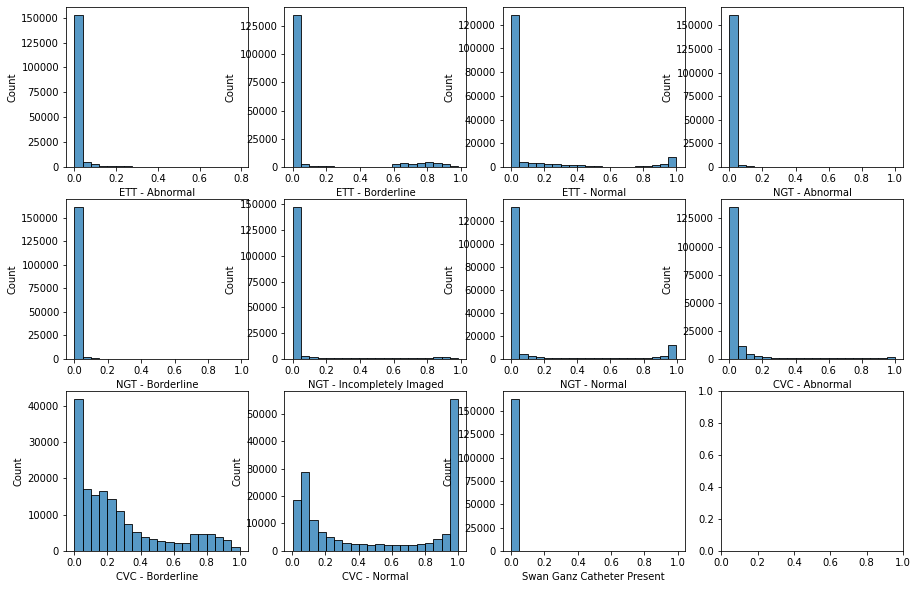

In [41]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for i, class_name in enumerate(class_names):
    sns.histplot(df_new, x=class_name, bins=20, ax=axs[i // 4][i % 4])

In [42]:
df_new.shape

(166773, 40)

In [43]:
df_new.to_csv('../chestx_pseudolabeled_data_lazy_balancing.csv', index=False)

In [44]:
df_new

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.000022,0.000046,0.000157,0.000196,0.000045,0.000147,0.011330,0.306152,0.403320,0.000069
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0.000004,0.000001,0.000134,0.000141,0.000008,0.000040,0.017715,0.180542,0.369629,0.000044
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.000111,0.000048,0.000566,0.000416,0.000358,0.000448,0.021484,0.344727,0.060760,0.000154
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.000077,0.000102,0.000612,0.000970,0.000225,0.001099,0.064392,0.158936,0.046631,0.000106
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.000052,0.000310,0.000253,0.000177,0.000061,0.000259,0.010208,0.201294,0.115967,0.000054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166768,00000032_059.png,Cardiomegaly|Infiltration,59,32,55,F,AP,2500,2048,0.168,...,0.788086,0.091553,0.018051,0.038757,0.213745,0.269531,0.113403,0.797363,0.987305,0.002768
166769,00011702_064.png,Cardiomegaly|Consolidation,64,11702,26,F,AP,2500,2048,0.168,...,0.683594,0.160767,0.053894,0.306641,0.101257,0.037689,0.048584,0.784668,0.986816,0.054291
166770,00013613_014.png,Effusion,14,13613,48,F,AP,2500,2048,0.168,...,0.789551,0.021622,0.000542,0.002398,0.003298,0.984863,0.145874,0.798340,0.990723,0.000315
166771,00013613_016.png,Effusion,16,13613,48,F,AP,2500,2048,0.168,...,0.833984,0.092834,0.000238,0.001957,0.003975,0.993652,0.186035,0.771973,0.976074,0.000499


In [45]:
df_new.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11',
       'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
       'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'No Finding', 'Mass',
       'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax', 'fold',
       'dirname', 'ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal',
       'NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged',
       'NGT - Normal', 'CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal',
       'Swan Ganz Catheter Present'],
      dtype='object')